<a href="https://colab.research.google.com/github/yogithahegde/Full-stack-data-science-projects/blob/main/hands_on_AUC_and_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
import warnings
warnings.filterwarnings('ignore')



df = read_csv('/content/pima-indians-diabetes.csv')

X = df.drop('class',axis = 1)
Y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)


classifier1 = LogisticRegression()

classifier2 = svm.SVC(kernel='linear', probability=True)


probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [5]:
probas1_ # here there are 2 columns one is probability of 0 and 2nd column is probability of 1

array([[0.6334579 , 0.3665421 ],
       [0.7116741 , 0.2883259 ],
       [0.88096019, 0.11903981],
       [0.94149913, 0.05850087],
       [0.78335483, 0.21664517],
       [0.71527092, 0.28472908],
       [0.62519533, 0.37480467],
       [0.90592754, 0.09407246],
       [0.83624216, 0.16375784],
       [0.76080637, 0.23919363],
       [0.64965019, 0.35034981],
       [0.93404582, 0.06595418],
       [0.02813972, 0.97186028],
       [0.2844502 , 0.7155498 ],
       [0.98996334, 0.01003666],
       [0.30917404, 0.69082596],
       [0.76908679, 0.23091321],
       [0.7385147 , 0.2614853 ],
       [0.85821723, 0.14178277],
       [0.82912366, 0.17087634],
       [0.66014646, 0.33985354],
       [0.89796259, 0.10203741],
       [0.06205399, 0.93794601],
       [0.77716981, 0.22283019],
       [0.93056231, 0.06943769],
       [0.56434507, 0.43565493],
       [0.79388681, 0.20611319],
       [0.36256245, 0.63743755],
       [0.92437753, 0.07562247],
       [0.59515632, 0.40484368],
       [0.

True positive == Recall

The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events (regardless of classification).

FP/FP+TN:

In [2]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1]) # here we can see we are considering probability of 1
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.830152


In [3]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.836043


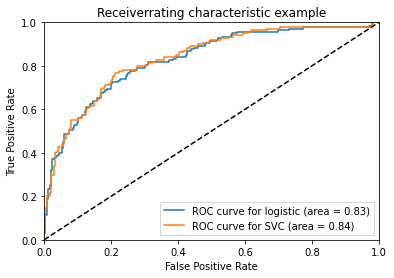

In [4]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the diabetes and no diabetes.